# Gaussian Mixture models

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# import matplotlib.image as mpimg
# import matplotlib as mpl
from icecream import ic
# plt.rcParams['figure.figsize'] = [16,8]
# plt.rcParams.update({'font.size': 18})

%config InlineBackend.figure_format = 'retina'
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

### Load the Iris dataset

The Iris Dataset. This data sets consists of 3 different types of irises' (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray. The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width. The below plot uses the first two features.

In [2]:
iris = datasets.load_iris()
#next we import it into a pandas frame for convenience (not necessry)
pdiris = pd.DataFrame(iris.data, columns=iris.feature_names)
print(pdiris.shape)
pdiris.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Plots 

Below we will see some 2d plots just to get a feel of the data. There appears to be some clustering but it is hard to infer the number of clusters of the 4d datasets from 2d plots. 

Text(0, 0.5, 'petal length (cm)')

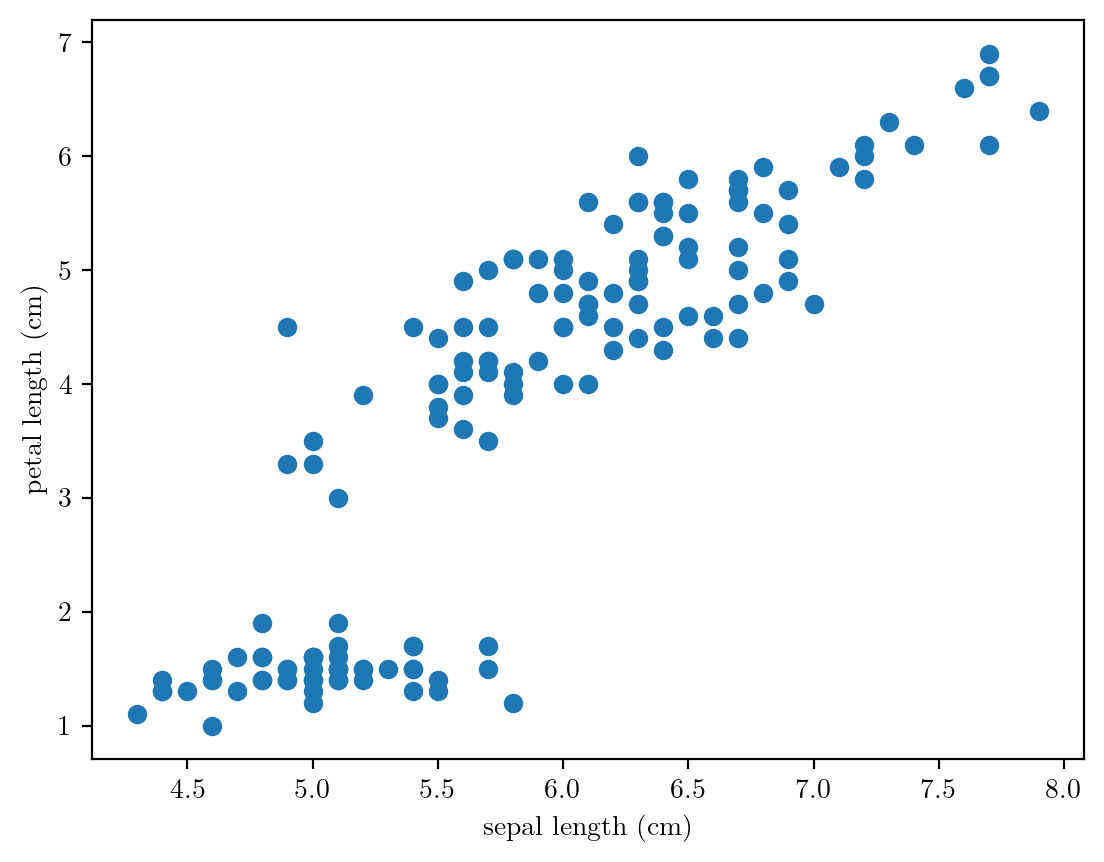

In [3]:
plt.plot(pdiris['sepal length (cm)'], pdiris['petal length (cm)'], 'o')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

Text(0, 0.5, 'petal width (cm)')

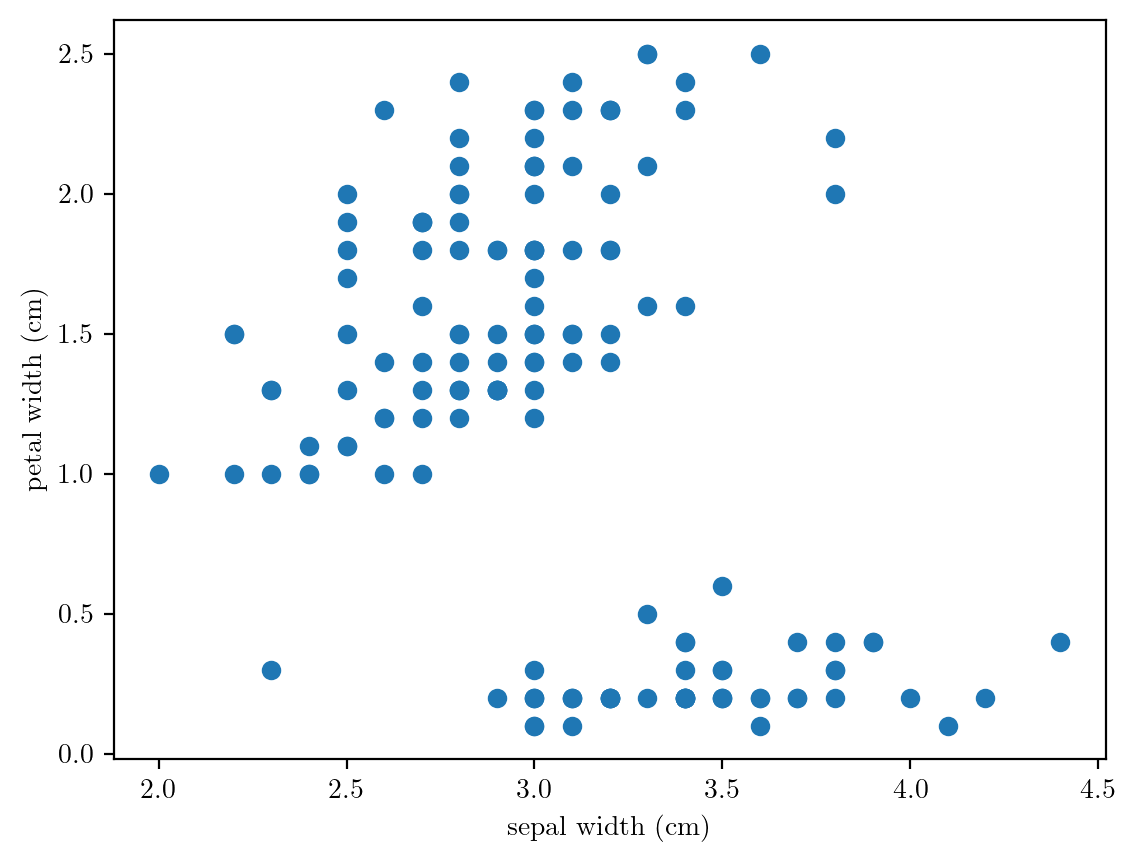

In [4]:
plt.plot(pdiris['sepal width (cm)'], pdiris['petal width (cm)'], 'o')
plt.xlabel('sepal width (cm)')
plt.ylabel('petal width (cm)')

### Fitting GMMs using the EM algorithm

The code for doing so is given below. The '.fit' bit obtains the maximum likelihood estimations of means and covariances that can be viewed using '.means_' and '.covariances_'

We start by inspecting and visualising a 2-d dataset with only the 'sepal width (cm)' and 'petal width (cm)' variables. The full dataset is analysed afterwards

In [5]:
vars = ['sepal width (cm)','petal width (cm)']
gmm = GaussianMixture(n_components=2)
gmm.fit(pdiris[vars])
print(gmm.means_)
print('\n')
print(gmm.covariances_)

[[2.8682708  1.66689483]
 [3.44312706 0.24524535]]


[[[0.11104185 0.08380788]
  [0.08380788 0.18987438]]

 [[0.12543252 0.01006202]
  [0.01006202 0.01098207]]]


### Soft allocation of individuals to clusters

GMM method does not necesarily allocates individuals with certainty but with probabilities.

Adding the probabilities can give us an idea of how many objects each cluster has.

In [6]:
probs = gmm.predict_proba(pdiris[vars])
print(np.sum(probs,axis=0))
print(probs[21:50].round(3))

[100.70617494  49.29382506]
[[0.    1.   ]
 [0.    1.   ]
 [0.001 0.999]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.7   0.3  ]
 [0.    1.   ]
 [0.003 0.997]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]]


### Model Search

We need to fit models with different numbers of clusters and different types of covariance matrices to identify the best one. This is done via the information-theoretic criteria (BIC) (the smaller the better in this case)

Types of covariance matrices:
 - spherical: each cluster k has covariance $\sigma^2_k I$
 - tied: full covariance matrix but the same across clusters
 - diag: diagonal covariance matrix, different for each cluster
 - full: full covariance matrix, different for each cluster
 
 
### Activity 1
 Write your code in the following cell. It is recommended to save your output in a Panda dataframe and print mean and covariance of the best GMM.

In [14]:
vars = ['sepal width (cm)','petal width (cm)','sepal length (cm)','petal length (cm)']
cov_types = ["spherical", "diag", "tied", "full"]

probs_list = []
clusters = np.arange(1,11,1)

best_bic = np.infty
best_gmm = None
best_cov = None
best_k = None

for i in clusters:
    k = int(i)
    for cv in cov_types:

        gmm = GaussianMixture(n_components=k, covariance_type=cv)
        gmm.fit(pdiris[vars])
        bic = gmm.bic(pdiris[vars])
        # bic2 = k*np.log(pdiris[vars].shape[0]) - 2*np.sum(gmm.score_samples(pdiris[vars]))
        # print(bic, bic2)

        if bic < best_bic:
            best_bic = bic
            best_gmm = gmm
            best_cov = cv
            best_k = k

data = {
    'Best Number of Clusters': [best_k],
    'Best BIC': [best_gmm.bic(pdiris[vars])],
    'Best Covariance Type': [best_cov],
    'Best Means': [best_gmm.means_],
    'Best Covariance': [best_gmm.covariances_]   
}

df_best_gmm = pd.DataFrame(data)

print(df_best_gmm.columns[0], df_best_gmm['Best Number of Clusters'][0])
print(df_best_gmm.columns[1], df_best_gmm['Best BIC'][0])
print(df_best_gmm.columns[2], df_best_gmm['Best Covariance Type'][0])
print(df_best_gmm.columns[3], np.round(df_best_gmm['Best Means'][0], 2))
print(df_best_gmm.columns[4], np.round(df_best_gmm['Best Covariance'][0], 2))

Best Number of Clusters 2
Best BIC 574.017832720746
Best Covariance Type full
Best Means [[3.43 0.25 5.01 1.46]
 [2.87 1.68 6.26 4.91]]
Best Covariance [[[0.14 0.01 0.1  0.01]
  [0.01 0.01 0.01 0.01]
  [0.1  0.01 0.12 0.02]
  [0.01 0.01 0.02 0.03]]

 [[0.11 0.08 0.12 0.14]
  [0.08 0.18 0.17 0.29]
  [0.12 0.17 0.43 0.45]
  [0.14 0.29 0.45 0.67]]]


### Activity 2
Repeat the analysis using only two of the four variables. Do we get a different conclusion on the number of clusters? 

Put your code below

In [166]:
vars = ['sepal width (cm)','petal width (cm)'] #,'sepal length (cm)','petal length (cm)'
cov_types = ["spherical", "diag", "tied", "full"]

probs_list = []
clusters = np.arange(1,11,1)

best_bic = np.infty
best_gmm = None
best_cov = None
best_k = None

for i in clusters:
    k = int(i)
    for cv in cov_types:

        gmm = GaussianMixture(n_components=k, covariance_type=cv, max_iter=1000)
        gmm.fit(pdiris[vars])
        bic = gmm.bic(pdiris[vars])
        
        if bic < best_bic:
            best_bic = bic
            best_gmm = gmm
            best_cov = cv
            best_k = k

data = {
    'Best Number of Clusters': [best_k],
    'Best BIC': [best_gmm.bic(pdiris[vars])],
    'Best Covariance Type': [best_cov],
    'Best Means': [best_gmm.means_],
    'Best Covariance': [best_gmm.covariances_]   
}

df_best_gmm = pd.DataFrame(data)

print(df_best_gmm.columns[0], df_best_gmm[df_best_gmm.columns[0]][0])
print(df_best_gmm.columns[1], df_best_gmm[df_best_gmm.columns[1]][0])
print(df_best_gmm.columns[2], df_best_gmm[df_best_gmm.columns[2]][0])
print(df_best_gmm.columns[3], np.round(df_best_gmm[df_best_gmm.columns[3]][0], 2))
print(df_best_gmm.columns[4], np.round(df_best_gmm[df_best_gmm.columns[4]][0], 2))

Best Number of Clusters 10
Best BIC 135.74006234472827
Best Covariance Type full
Best Means [[3.48 0.32]
 [2.67 1.98]
 [2.5  1.16]
 [3.35 0.2 ]
 [2.89 1.36]
 [3.11 2.22]
 [3.74 2.21]
 [2.28 1.34]
 [2.94 1.8 ]
 [4.23 0.23]]
Best Covariance [[[ 0.09  0.02]
  [ 0.02  0.02]]

 [[ 0.02  0.01]
  [ 0.01  0.06]]

 [[ 0.07  0.06]
  [ 0.06  0.13]]

 [[ 0.07  0.  ]
  [ 0.    0.  ]]

 [[ 0.05  0.03]
  [ 0.03  0.02]]

 [[ 0.03  0.02]
  [ 0.02  0.03]]

 [[ 0.01 -0.02]
  [-0.02  0.04]]

 [[ 0.01 -0.01]
  [-0.01  0.02]]

 [[ 0.04 -0.  ]
  [-0.    0.  ]]

 [[ 0.02  0.02]
  [ 0.02  0.02]]]


### Simulate data to test the method

So far we have been looking at a dataset where we are not sure about the 'true' number of clusters and type of covariance matrix.

### Activity 3

In following cell, simulate data from a Gaussian mixture with three components with the mean and covariance matrix as following.

1\. $mean = (0,0),\quad cov=1I$,

2\. $mean = (-6,3),\quad cov = 16I,$

3\. $mean = (3,-4),\quad cov=9I$.

Text(0, 0.5, '$x_2$')

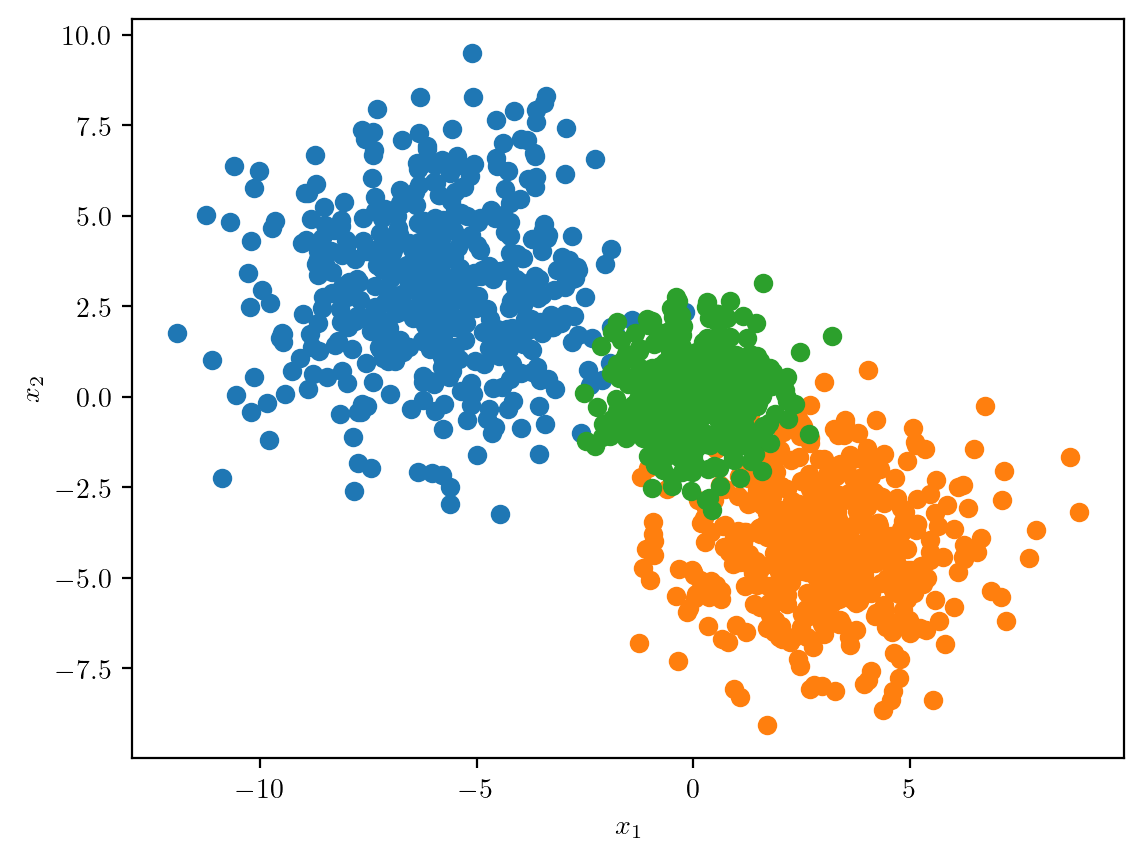

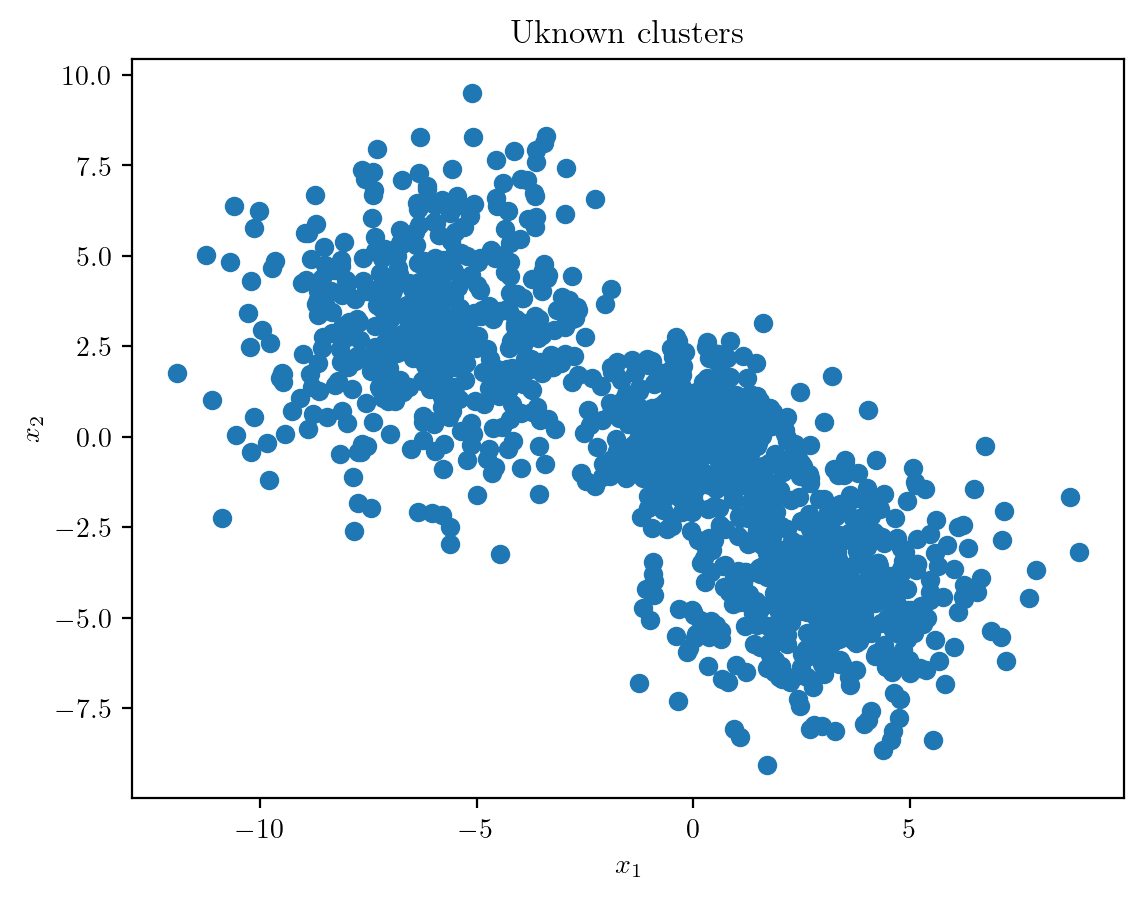

In [7]:
n_samples = 500

mean1 = np.array([0, 0])
cov1 = np.array([[1, 0], [0, 1]])
data1 = np.random.multivariate_normal(mean1, np.sqrt(cov1), n_samples)

mean2 = np.array([-6, 3])
cov2 = 16*np.array([[1, 0], [0, 1]])
data2 = np.random.multivariate_normal(mean2, np.sqrt(cov2), n_samples)

mean3 = np.array([3, -4])
cov3 = 9*np.array([[1, 0], [0, 1]])
data3 = np.random.multivariate_normal(mean3, np.sqrt(cov3), n_samples)

data = np.vstack((data1, data2, data3))
df_gauss = pd.DataFrame(data, columns=['x1', 'x2'])

fig = plt.figure()
plt.plot(data2[:,0], data2[:,1], 'o')
plt.plot(data3[:,0], data3[:,1], 'o')
plt.plot(data1[:,0], data1[:,1], 'o')
# plt.title('True clusters')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
path = r'C:\Users\erikn\skola\SSY316-Advanced-Probabilistic-Machine-Learning\python-lab-5\report-images'
fig.savefig(path+r'\a3_clusters')

plt.figure()
plt.plot(df_gauss['x1'], df_gauss['x2'], 'o')
plt.title('Uknown clusters')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

### Test the method

Below you will repeat the previous model search procedure to the synthetic data that you generated in the previous cell. We would like to test whether the optimal models will indeed be the one with three components and spherical covariance

In [10]:
vars = ['x1','x2']
cov_types = ["spherical", "diag", "tied", "full"]

probs_list = []
clusters = np.arange(1,11,1)

best_bic = np.infty
best_gmm = None
best_cov = None
best_k = None

for i in clusters:
    k = int(i)
    # print('\nk =', k)
    for cv in cov_types:

        gmm = GaussianMixture(n_components=k, covariance_type=cv)
        gmm.fit(df_gauss[vars])
        bic = gmm.bic(df_gauss[vars])

        if bic < best_bic:
            best_bic = bic
            best_gmm = gmm
            best_cov = cv
            best_k = k
            # print(bic)

data = {
    'Best Number of Clusters': [best_k],
    'Best BIC': [best_gmm.bic(df_gauss[vars])],
    'Best Covariance Type': [best_cov],
    'Best Means': [best_gmm.means_],
    'Best Covariance': [best_gmm.covariances_]   
}

df_best_gmm = pd.DataFrame(data)

print(df_best_gmm.columns[0], df_best_gmm[df_best_gmm.columns[0]][0])
print(df_best_gmm.columns[1], df_best_gmm[df_best_gmm.columns[1]][0])
print(df_best_gmm.columns[2], df_best_gmm[df_best_gmm.columns[2]][0])
print(df_best_gmm.columns[3], df_best_gmm[df_best_gmm.columns[3]][0])
print(df_best_gmm.columns[4], df_best_gmm[df_best_gmm.columns[4]][0])

Best Number of Clusters 3
Best BIC 14170.342265911058
Best Covariance Type spherical
Best Means [[ 0.05480053  0.0468644 ]
 [-5.98630429  3.03384853]
 [ 2.96949996 -4.08459566]]
Best Covariance [1.0362137  4.16061153 2.87274858]


### Activity 4

Conduct another simulation experiment generating data from a Gaussian mixture. Choose your own number of components, means and covariances.

C:\Users\erikn\AppData\Local\Temp\ipykernel_16084\918058419.py:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data1 = np.random.multivariate_normal(mean1, np.sqrt(cov1), n_samples)
C:\Users\erikn\AppData\Local\Temp\ipykernel_16084\918058419.py:9: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data2 = np.random.multivariate_normal(mean2, np.sqrt(cov2), n_samples)
C:\Users\erikn\AppData\Local\Temp\ipykernel_16084\918058419.py:13: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data3 = np.random.multivariate_normal(mean3, np.sqrt(cov3), n_samples)
C:\Users\erikn\AppData\Local\Temp\ipykernel_16084\918058419.py:17: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data4 = np.random.multivariate_normal(mean4, np.sqrt(cov4), n_samples)


Text(0, 0.5, '$x_2$')

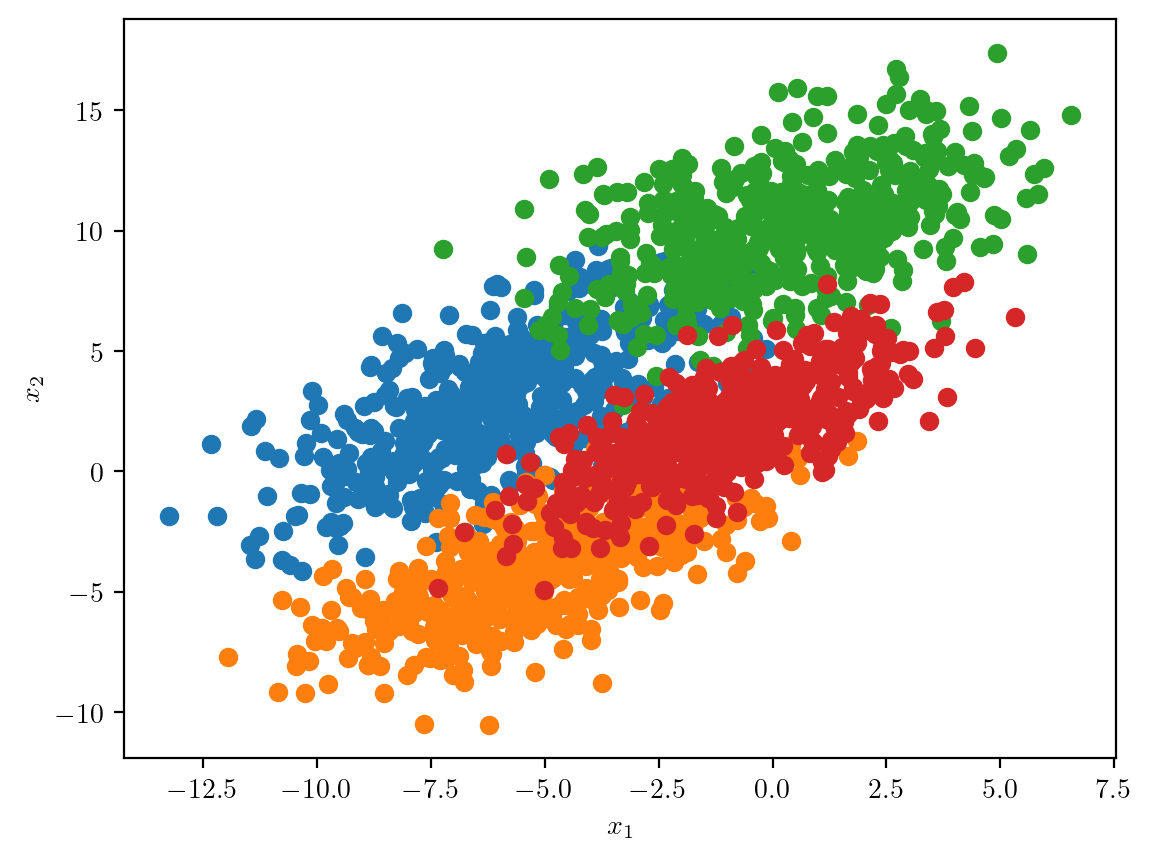

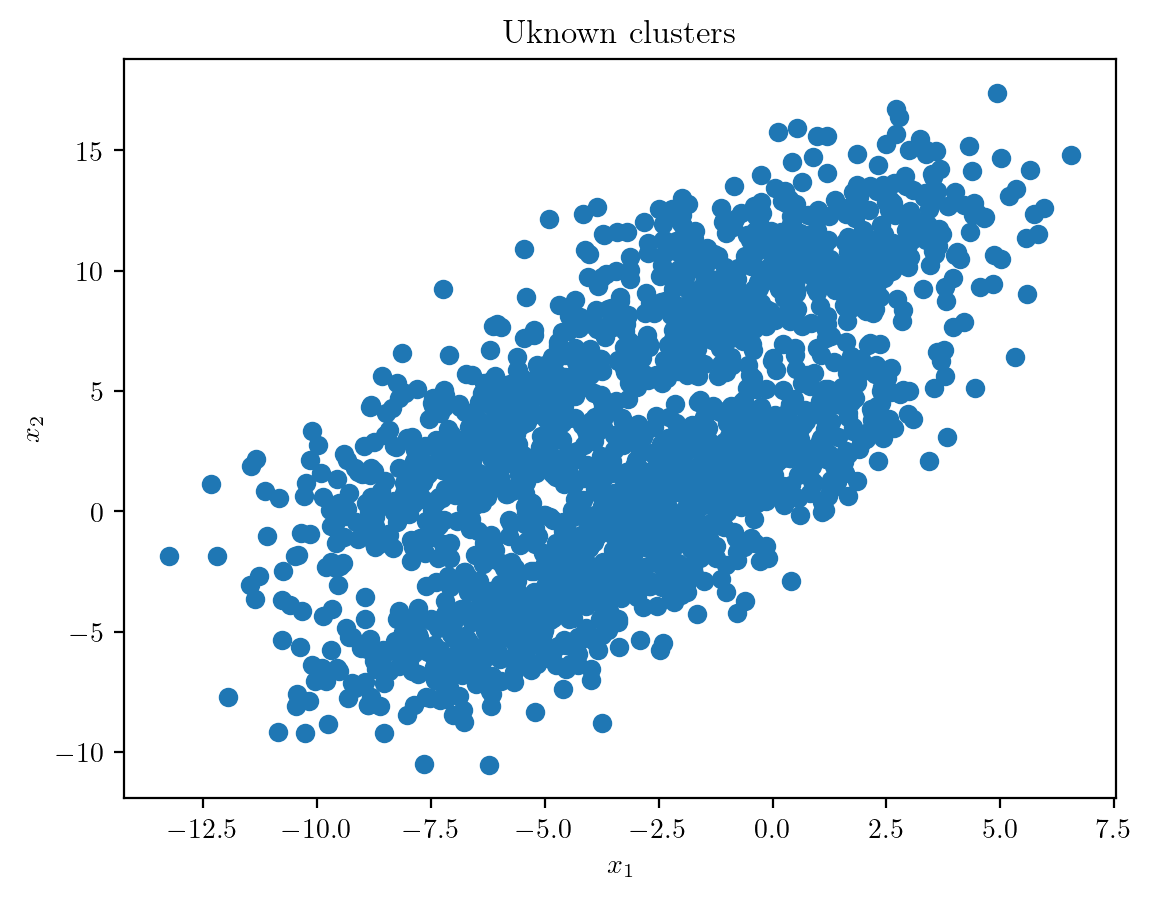

In [23]:
n_samples = 500

mean1 = np.array([0, 10])
cov1 = 5*np.array([[2, 7], [7, 1]])
data1 = np.random.multivariate_normal(mean1, np.sqrt(cov1), n_samples)

mean2 = np.array([-6, 3])
cov2 = 16*np.array([[1, 3], [3, 2]])
data2 = np.random.multivariate_normal(mean2, np.sqrt(cov2), n_samples)

mean3 = np.array([-5, -4])
cov3 = 9*np.array([[2, 3], [3, 1]])
data3 = np.random.multivariate_normal(mean3, np.sqrt(cov3), n_samples)

mean4 = np.array([-1, 2])
cov4 = 9*np.array([[1, 2], [2, 1]])
data4 = np.random.multivariate_normal(mean4, np.sqrt(cov4), n_samples)

data = np.vstack((data1, data2, data3, data4))
df_gauss = pd.DataFrame(data, columns=['x1', 'x2'])

fig = plt.figure()
plt.plot(data2[:,0], data2[:,1], 'o')
plt.plot(data3[:,0], data3[:,1], 'o')
plt.plot(data1[:,0], data1[:,1], 'o')
plt.plot(data4[:,0], data4[:,1], 'o')
# plt.title('True clusters')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
path = r'C:\Users\erikn\skola\SSY316-Advanced-Probabilistic-Machine-Learning\python-lab-5\report-images'
fig.savefig(path+r'\a4_clusters')

plt.figure()
plt.plot(df_gauss['x1'], df_gauss['x2'], 'o')
plt.title('Uknown clusters')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [26]:
vars = ['x1','x2']
cov_types = ["spherical", "diag", "tied", "full"]

probs_list = []
clusters = np.arange(1,11,1)

best_bic = np.infty
best_gmm = None
best_cov = None
best_k = None

for i in clusters:
    k = int(i)
    # print('\nk =', k)
    for cv in cov_types:

        gmm = GaussianMixture(n_components=k, covariance_type=cv)
        gmm.fit(df_gauss[vars])
        bic = gmm.bic(df_gauss[vars])

        if bic < best_bic:
            best_bic = bic
            best_gmm = gmm
            best_cov = cv
            best_k = k
            # print(bic)

data = {
    'Best Number of Clusters': [best_k],
    'Best BIC': [best_gmm.bic(df_gauss[vars])],
    'Best Covariance Type': [best_cov],
    'Best Means': [best_gmm.means_],
    'Best Covariance': [best_gmm.covariances_]   
}

df_best_gmm = pd.DataFrame(data)

print(df_best_gmm.columns[0], df_best_gmm[df_best_gmm.columns[0]][0])
print(df_best_gmm.columns[1], df_best_gmm[df_best_gmm.columns[1]][0])
print(df_best_gmm.columns[2], df_best_gmm[df_best_gmm.columns[2]][0])
print(df_best_gmm.columns[3], df_best_gmm[df_best_gmm.columns[3]][0])
print(df_best_gmm.columns[4], df_best_gmm[df_best_gmm.columns[4]][0])

Best Number of Clusters 4
Best BIC 21645.734828441397
Best Covariance Type full
Best Means [[-6.32639029  2.65442479]
 [-0.01778053  9.90204382]
 [-5.28616887 -4.10423841]
 [-1.07509901  1.77550053]]
Best Covariance [[[5.02763037 4.03016316]
  [4.03016316 6.94504042]]

 [[6.54264773 3.4131077 ]
  [3.4131077  6.25241203]]

 [[4.94358441 3.12395731]
  [3.12395731 4.6886262 ]]

 [[4.10682771 2.90164372]
  [2.90164372 4.49501498]]]


## Overfitted (Bayesian) Gaussian Mixtures

Now we will explore what happens when we fit a model with more components than the ones in the data. 

In [30]:
# Number of samples per component
n_samples = 200
X = np.r_[np.random.randn(n_samples, 2), 
          .4 * np.random.randn(n_samples, 2) + np.array([-6, 3]), 
         3* np.random.randn(n_samples, 2) + np.array([3, -4])] 

gmm = GaussianMixture(n_components=6,covariance_type='spherical')

gmm.fit(X)
probs = gmm.predict_proba(X)
results = np.sum(probs,axis=0)
results = pd.DataFrame(results.round(0), columns = ['# of individuals'], index=range(1,7))
results

,# of individuals
1,25.0
2,221.0
3,200.0
4,48.0
5,20.0
6,85.0


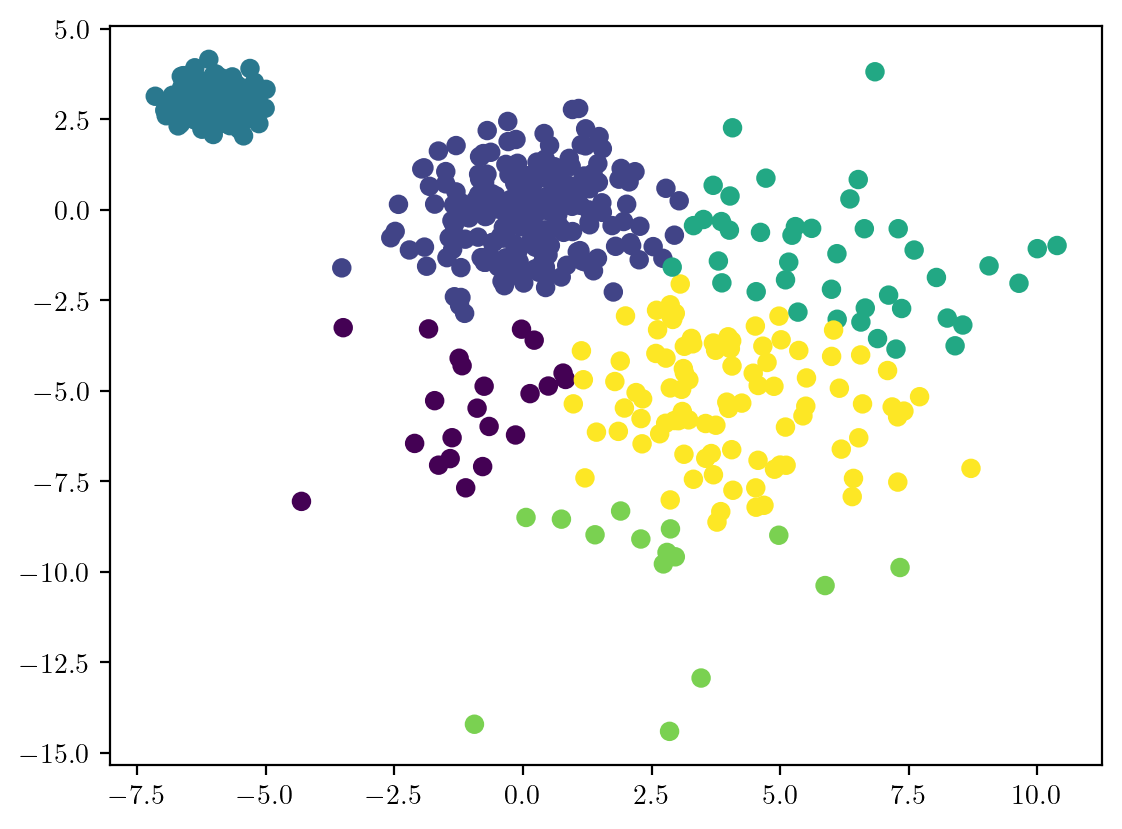

In [32]:
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels) 

We will also apply the fully Bayesian model to the same data with a Dirichlet prior on the cluster probabilities with a low hyperparameter (weight_concentration_prior) of 0.01. This choice is going to penalise redundant clusters by not allocating individuals to them unless it is necessaray 

In [33]:
Bgmm = BayesianGaussianMixture(n_components=6,covariance_type='full',
                               weight_concentration_prior=0.01, max_iter = 200)
Bgmm.fit(X)
probs = Bgmm.predict_proba(X)
results = np.sum(probs,axis=0)
results = pd.DataFrame(results.round(0), columns = ['# of individuals'], index=range(1,7))
results

,# of individuals
1,188.0
2,200.0
3,212.0
4,0.0
5,0.0
6,0.0


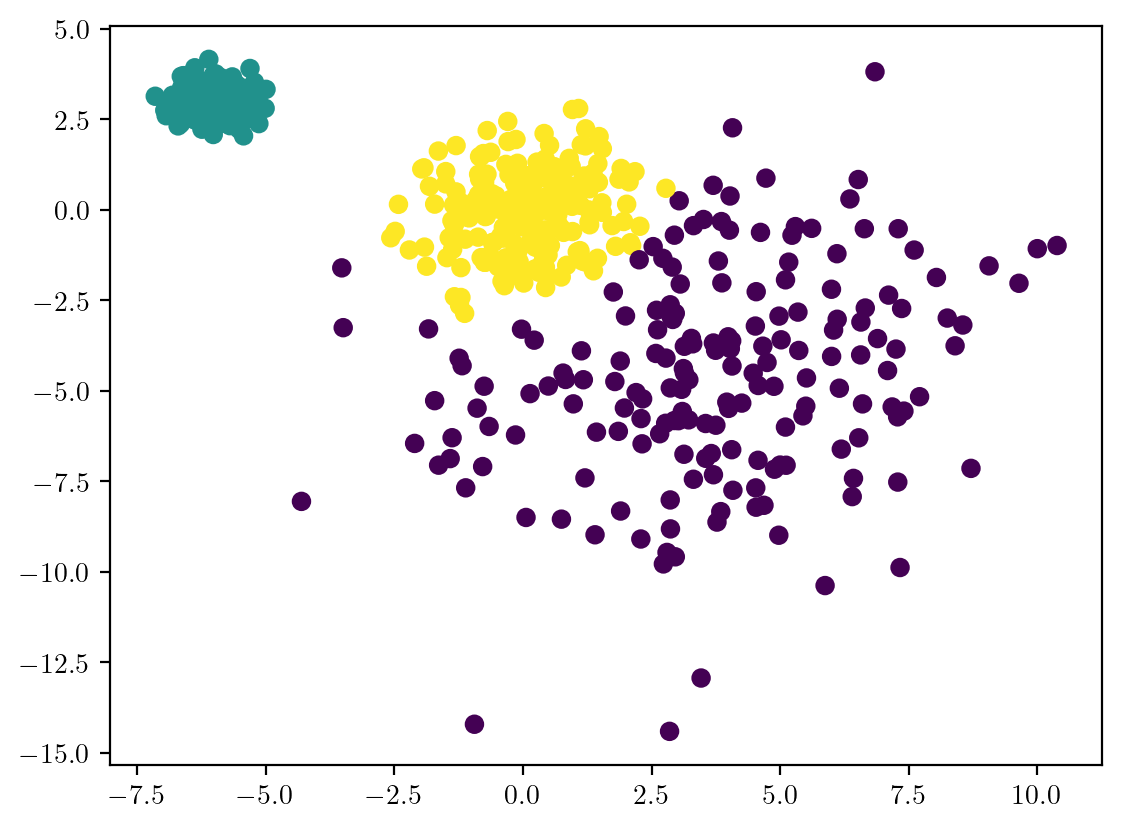

In [34]:
labels = Bgmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)

### Activity 5

Fit the fully Bayesian approach to the Iris dataset and check the resulting number of clusters. Put your code below.

In [41]:
vars = ['sepal width (cm)','petal width (cm)','sepal length (cm)','petal length (cm)']
k = 10
gmm = GaussianMixture(n_components=k)

gmm.fit(pdiris[vars])
probs = gmm.predict_proba(pdiris[vars])
results = np.sum(probs,axis=0)
results = pd.DataFrame(results.round(0), columns=['# of individuals'], index=range(1,k+1))
results

,# of individuals
1,7.0
2,10.0
3,13.0
4,5.0
5,12.0
6,9.0
7,25.0
8,16.0
9,19.0
10,34.0


In [171]:
vars = ['sepal width (cm)','petal width (cm)','sepal length (cm)','petal length (cm)']
k = 10
Bgmm = BayesianGaussianMixture(n_components=k, covariance_type='full', weight_concentration_prior=0.01, max_iter=200)

Bgmm.fit(pdiris[vars])
probs = Bgmm.predict_proba(pdiris[vars])
results = np.sum(probs,axis=0)
results = pd.DataFrame(results.round(0), columns=['# of individuals'], index=range(1,k+1))
results

,# of individuals
1,50.0
2,85.0
3,0.0
4,13.0
5,0.0
6,0.0
7,2.0
8,0.0
9,0.0
10,0.0


## K-Means Clustering and PCA of Human Activity Recognition

### Dataset info

Human Activity Recognition database built from the recordings of 30 subjects performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (*WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING*) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. 

In [106]:
Data = pd.read_csv('train.csv') 

In [107]:
Data.sample(5)

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
333,951,WALKING_DOWNSTAIRS,0.441,-0.04540,-0.161,0.373,0.490,-0.328,0.301,0.349,...,-0.0119,-0.07120,-0.374,-0.635,-0.7150,0.745,-0.00411,-0.906,0.1590,-0.00684
293,851,STANDING,0.283,-0.00891,-0.134,-0.964,-0.824,-0.851,-0.968,-0.825,...,-0.2550,-0.18700,-0.592,0.039,0.0772,0.687,-0.40000,-0.816,0.0977,-0.11600
3197,9145,WALKING,0.329,0.00428,-0.148,-0.322,0.338,-0.407,-0.362,0.291,...,0.2770,0.51300,0.348,-0.203,0.2310,-0.880,0.62300,-0.706,0.3000,-0.00351
3038,8707,WALKING_UPSTAIRS,0.258,-0.01560,-0.113,-0.365,-0.208,-0.437,-0.420,-0.266,...,0.0893,0.00379,-0.346,0.676,-0.4560,0.872,0.79200,-0.736,0.2460,0.12800
2501,7158,WALKING_UPSTAIRS,0.164,-0.09690,0.015,-0.424,-0.266,-0.162,-0.472,-0.311,...,-0.1550,-0.31000,-0.688,0.198,0.4420,-0.738,0.72600,-0.845,0.2010,0.04810


In [108]:
print('Shape of the data set: ' + str(Data.shape))

Shape of the data set: (3609, 563)


In [109]:
#save labels as string
Labels = Data['activity']
Data = Data.drop(['rn', 'activity'], axis = 1)
Labels_keys = Labels.unique().tolist()
Labels = np.array(Labels)
print('Activity labels: ' + str(Labels_keys))

Activity labels: ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [110]:
#check for missing values
Temp = pd.DataFrame(Data.isnull().sum())
Temp.columns = ['Sum']
print('Amount of rows with missing values: ' + str(len(Temp.index[Temp['Sum'] > 0])) )

Amount of rows with missing values: 0


In [111]:
#normalize the dataset
scaler = StandardScaler()
Data = scaler.fit_transform(Data)

### Activity 6

Apply k-means clustering with different number of clusters and find the optimal number of clusters. Plot sum of squared distances of samples to their closest cluster center versus number of cluster. 

In [136]:
def plot_kmeans_error(Ks, errors, best_K, path):
    fig = plt.figure()
    plt.plot(Ks, errors)
    plt.axvline(x=best_K, color='r', linestyle='--', label='Opt. K')
    plt.xlabel('$K$')
    plt.ylabel('WCSS')
    plt.legend(loc='upper right')
    fig.tight_layout()
    fig.savefig(path, dpi=300)

def kmeans_clustering(n_Ks, data):
    Ks = np.linspace(1, n_Ks, n_Ks)
    best_K = None
    errors = []
    best_silh_score = -1

    for K in Ks:

        K = int(K)
        kmeans = KMeans(n_clusters=K)
        kmeans.fit(data)
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_
        error = kmeans.inertia_
        errors.append(error)

        if (K >= 2) and (K <= (data.shape[0]-1)):
            silh_score = silhouette_score(data, labels)

            if silh_score > best_silh_score:
                best_K = K
                best_labels = labels
                best_centroids = centers
                best_silh_score = silh_score
    
    print('Best K:', best_K)
    return best_labels, best_centroids, Ks, errors, best_K

In [102]:
n_Ks = 10
labels, centers, Ks, errors, best_K = kmeans_clustering(n_Ks, Data)

c:\Users\erikn\skola\venv_chalmers\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\erikn\skola\venv_chalmers\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\erikn\skola\venv_chalmers\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\erikn\skola\venv_chalmers\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Best K: 2


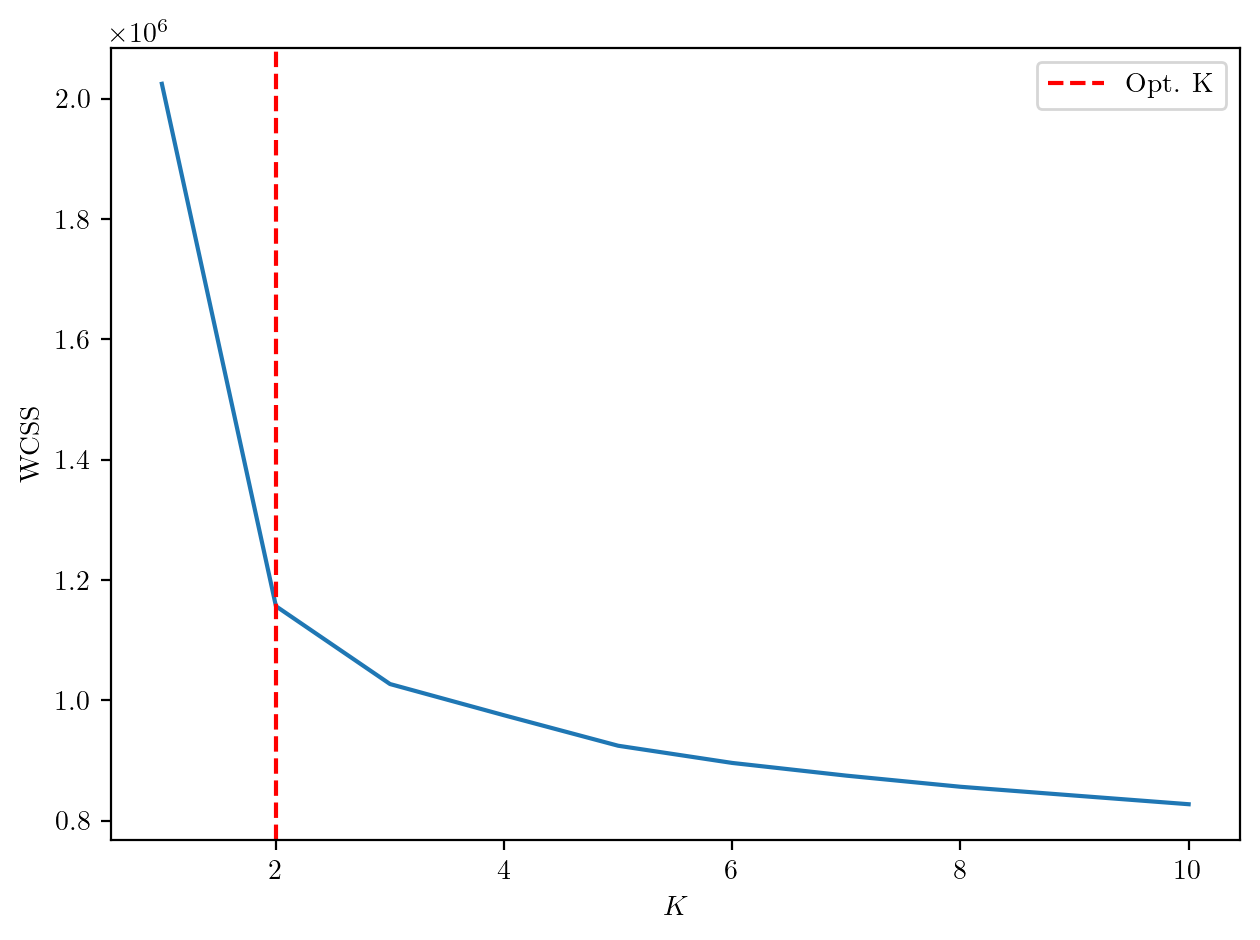

In [103]:
path = r'C:\Users\erikn\skola\SSY316-Advanced-Probabilistic-Machine-Learning\python-lab-5\report-images'
plot_kmeans_error(Ks, errors, best_K, path+r'\a6_kmeans_error.png')

### Activity 7

Apply PCA and analyze principal components for dimensionality reduction.

In [112]:
U, S, VT = np.linalg.svd(Data, full_matrices=False)

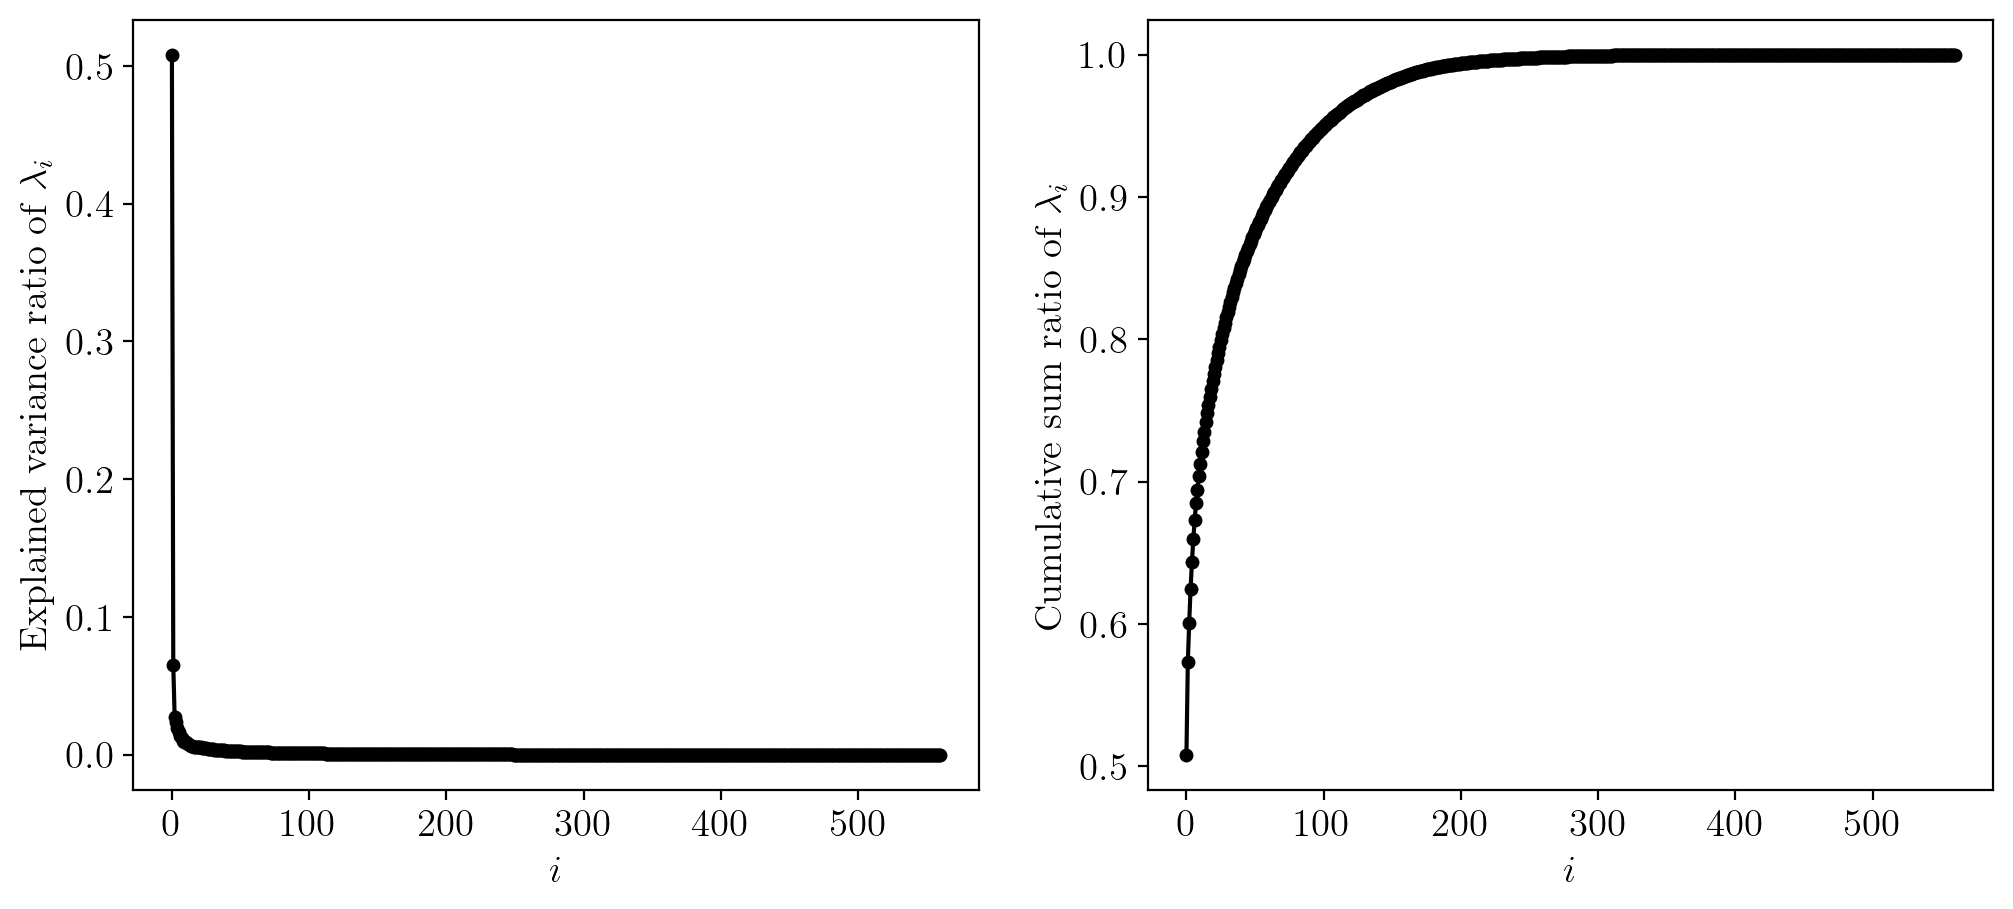

In [131]:
plt.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax1.plot(S**2/np.sum(S**2), '-o', ms=4, color='k')
ax1.set_xlabel('$i$')
ax1.set_ylabel('Explained variance ratio of $\lambda_i$')
ax2 = fig.add_subplot(122)
ax2.plot(np.cumsum(S**2)/np.sum(S**2), '-o', ms=4, color='k')
ax2.set_xlabel('$i$')
ax2.set_ylabel('Cumulative sum ratio of $\lambda_i$')
fig.savefig(path+r'\a7_pca', dpi=300)

# pca = PCA()
# pca.fit(Data)
# explained_variance_ratio = pca.explained_variance_ratio_
# explained_variance = pca.explained_variance_
# SS = pca.singular_values_

# fig = plt.figure()
# ax1 = fig.add_subplot(121)
# ax1.plot(explained_variance_ratio, '-o', color='k')
# ax1.set_xlabel('$i$')
# ax1.set_ylabel('Explained variance ratio of $\lambda_i$')
# ax2 = fig.add_subplot(122)
# ax2.plot(np.cumsum(explained_variance)/np.sum(explained_variance), '-o', color='k')
# ax2.set_xlabel('$i$')
# ax2.set_ylabel('Cumulative sum ratio of $\lambda_i$')

In [142]:
for i in range(Data.shape[0]):
    if np.sum(S[:i]**2)/np.sum(S**2) >= 0.95:
        pc95 = i+1
        print('The first', pc95, r'principle directions account for 95% of the variance.')
        break

print(S[2]**2/np.sum(S**2))

The first 103 principle directions account for 95% of the variance.
0.027603403697289596


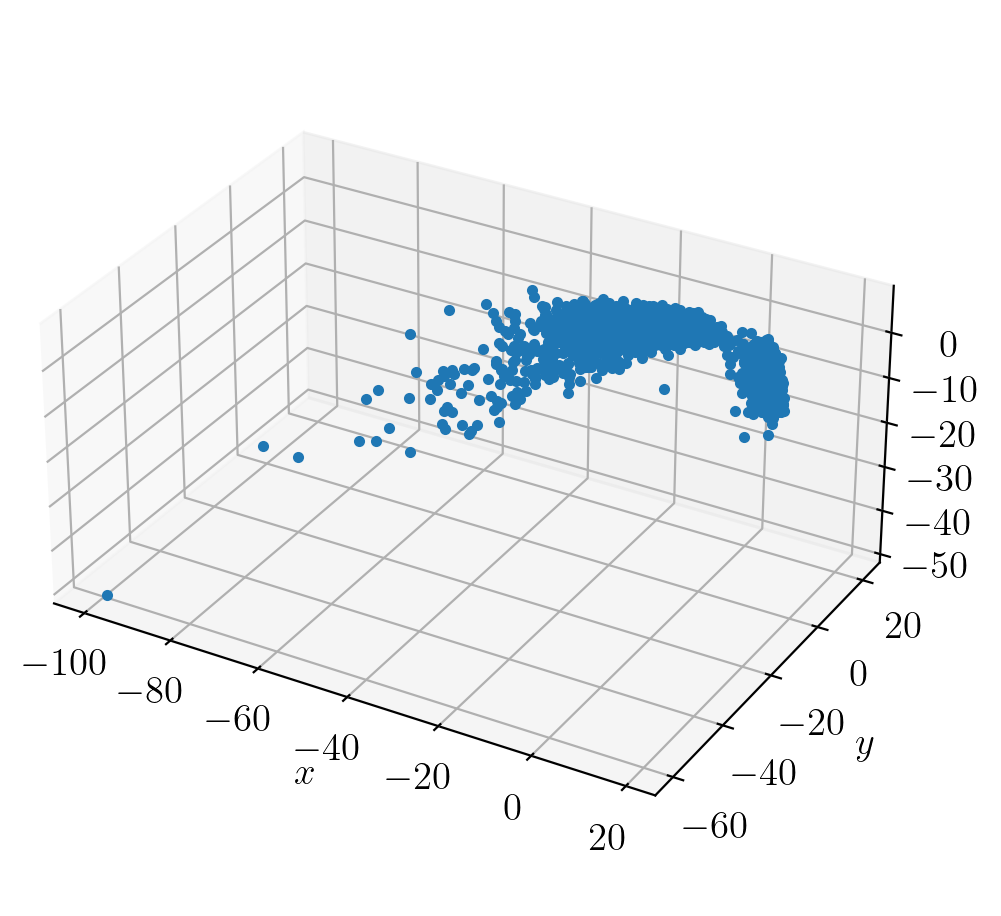

In [146]:
dd = 3
PC = U[:,:dd] @ np.diag(S)[:dd,:dd]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(PC[:,0], PC[:,1], PC[:,2], '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_aspect('equal')
# ax.legend(loc="lower right")
fig.tight_layout()

### Activity 8

Perform K-means clustering on the dimensionality-reduced data.

In [149]:
n_Ks = 10
labels, centers, Ks, errors, best_K = kmeans_clustering(n_Ks, PC)

c:\Users\erikn\skola\venv_chalmers\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\erikn\skola\venv_chalmers\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\erikn\skola\venv_chalmers\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\erikn\skola\venv_chalmers\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\erikn\skola\venv_chalmers\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

Best K: 2


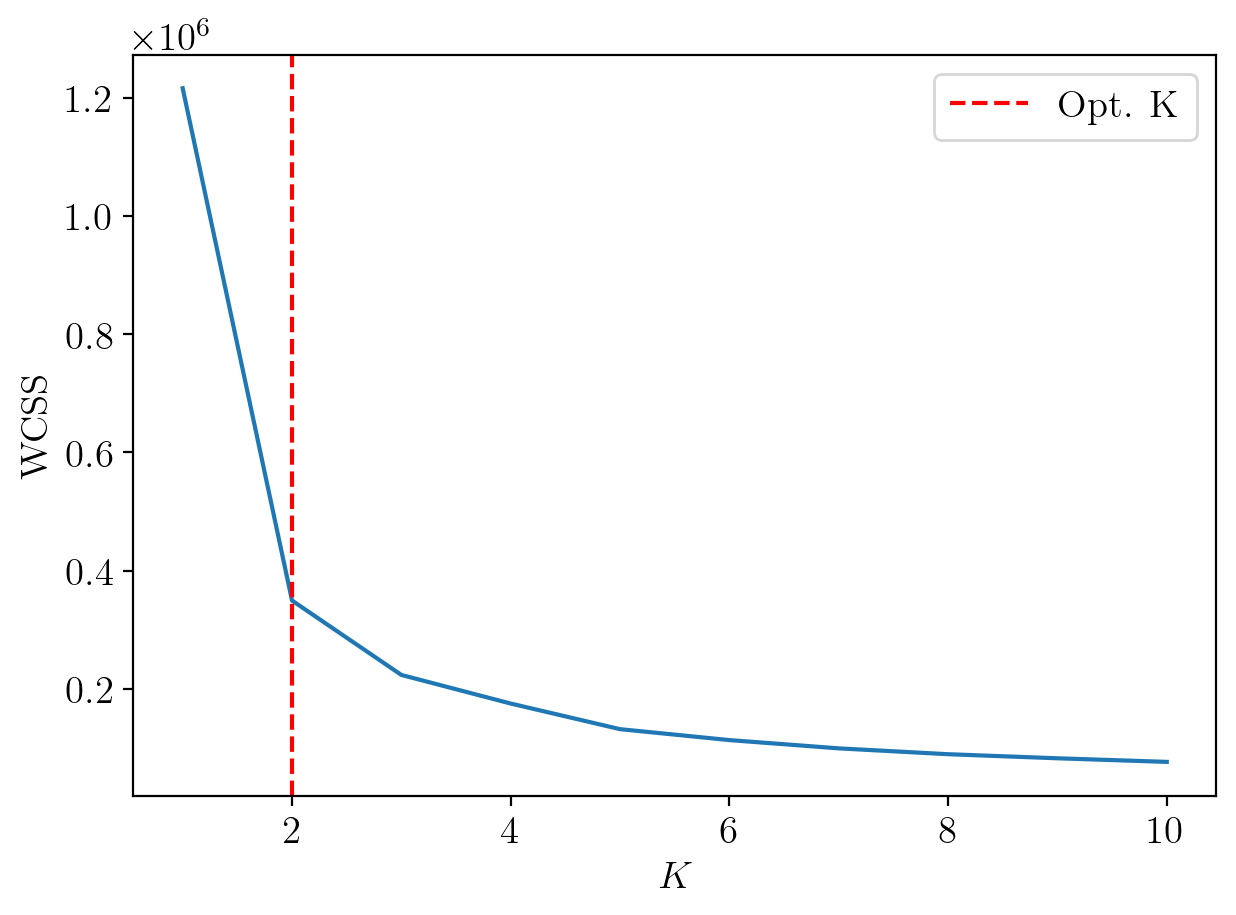

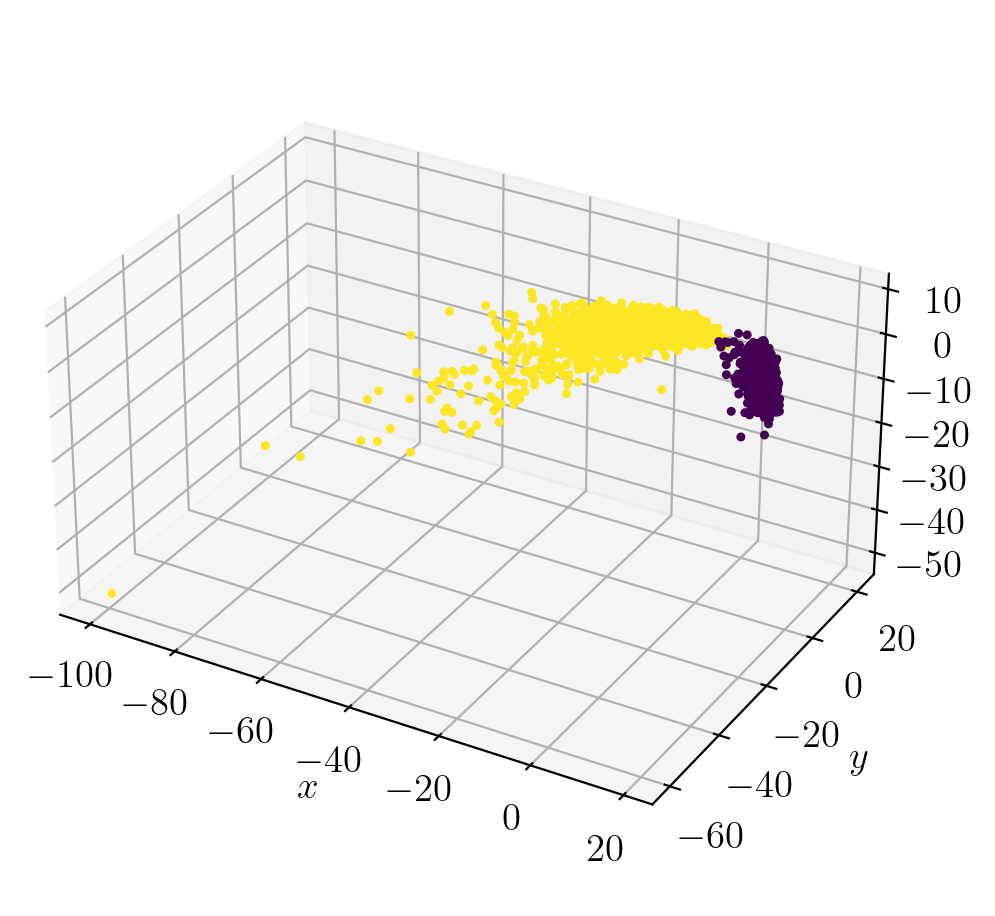

In [151]:
plot_kmeans_error(Ks, errors, best_K, path+r'\a8_kmeans_error.png')

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(PC[:,0], PC[:,1], PC[:,2], marker='.', c=labels, alpha=1)
ax.scatter(centers[:,0], centers[:,1], centers[:,2], marker='X', c='red', alpha=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_aspect('equal')
# ax.legend(loc="lower right")
fig.tight_layout()
fig.savefig(path+r'\a8_kmeans_clusters.png', dpi=300)